<a href="https://colab.research.google.com/github/LeMagnifiq/Thesis/blob/main/Suleyman_Yahaya_Final_Code_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Libraries**

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, auc,roc_curve, f1_score, accuracy_score, classification_report
from sklearn.model_selection import KFold
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# **Importing Data**

In [ ]:
Col_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'
]
from dataclasses import dataclass
# Loading the Dataset.
def load_data(path_to_file):

    nsl = pd.read_csv(path_to_file, header = 0, names = Col_names, index_col = False)
    
    return nsl
nsl_train = load_data('/content/drive/MyDrive/Thesis Data /NSL-KDD/KDDTrain+.txt')
nsl_test = load_data('/content/drive/MyDrive/Thesis Data /NSL-KDD/KDDTest+.txt')

In [ ]:
print('Training set:',nsl_train.shape)
print('Test set:',nsl_test.shape)

Training set: (125972, 42)
Test set: (22543, 42)


**Data Exploration**

In [ ]:
nsl_train.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.0,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.1,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.0,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal


Text(0.5, 1.0, 'Training Data')

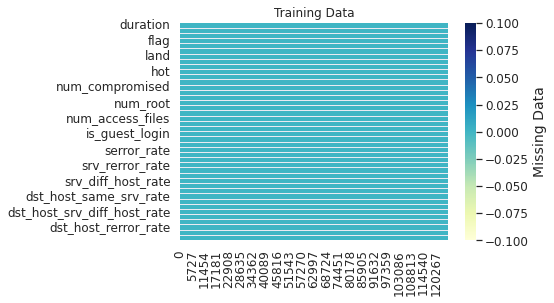

In [ ]:
#Checking for missing data in the training Data
sns.heatmap(nsl_train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("Training Data Missing_Value.png", dpi=100)
plt.title('Training Data')


Text(0.5, 1.0, 'Test Data')

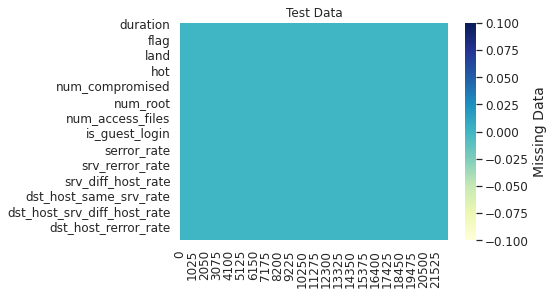

In [ ]:
#Checking for missing data in the training Data
sns.heatmap(nsl_test.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("Test Data Missing Value.png", dpi=100)
plt.title('Test Data')

In [ ]:
print('Label distribution Training set:')
print(nsl_train['class'].value_counts())
print()
print('Label distribution Test set:')
print(nsl_test['class'].value_counts())

Label distribution Training set:
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: class, dtype: int64

Label distribution Test set:
normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178


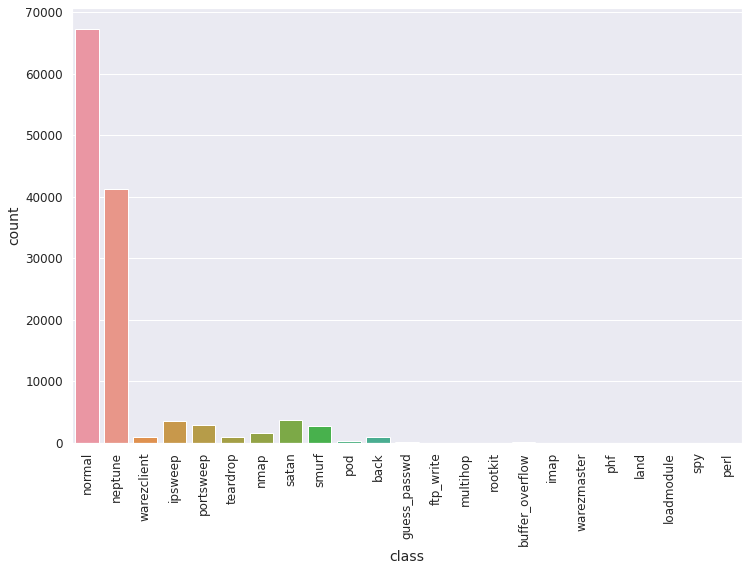

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(nsl_train['class'])
plt.xticks(rotation = 90)

plt.show()

In [ ]:
print('Training set:')
for col_name in nsl_train.columns:
    if nsl_train[col_name].dtypes == 'object' :
        unique_cat = len(nsl_train[col_name].unique())
        print("'{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Categorical Features:')
print(nsl_train['service'].value_counts().sort_values(ascending=False).head())

Training set:
'protocol_type' has 3 categories
'service' has 70 categories
'flag' has 11 categories
'class' has 23 categories

Categorical Features:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6859
Name: service, dtype: int64


In [ ]:
# Test set
print('Test set:')
for col_name in nsl_test.columns:
    if nsl_test[col_name].dtypes == 'object' :
        unique_cat = len(nsl_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'class' has 38 categories


In [ ]:
dummy_train = nsl_train.copy(deep = True)
dummy_test = nsl_test.copy(deep = True)

dummy_test.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [ ]:
dummy_train.rename(columns = {'class':'target'}, inplace = True)
dummy_test.rename(columns = {'class':'target'}, inplace = True)

## **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_train['protocol_type'] = le.fit_transform(dummy_train['protocol_type'])
dummy_test['protocol_type'] = le.transform(dummy_test['protocol_type'])
dummy_train['service'] = le.fit_transform(dummy_train['service'])
dummy_test['service'] =le.transform(dummy_test['service'])
dummy_train['flag'] = le.fit_transform(dummy_train['flag'])
dummy_test['flag'] = le.transform(dummy_test['flag'])

In [ ]:
label = []
for i in dummy_train.target :
  if i == 'normal':
    label.append(0)
  else:
    label.append(1)
dummy_train['target'] = label 


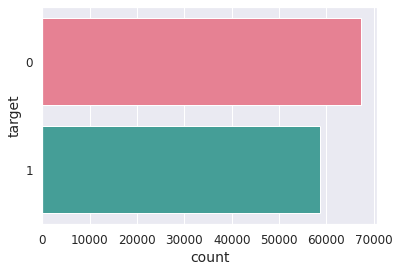

In [ ]:
sns.countplot(y="target", data = dummy_train, palette="husl")

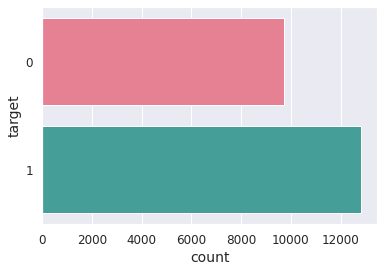

In [ ]:
#Test Set
label_test = []
for i in dummy_test.target :
  if i == 'normal':
    label_test.append(0)
  else:
    label_test.append(1)
dummy_test['target'] = label_test
sns.countplot(y="target", data = dummy_test, palette="husl")

In [ ]:
print(dummy_train['target'].value_counts())
print(dummy_test['target'].value_counts())

0    67342
1    58630
Name: target, dtype: int64
1    12832
0     9711
Name: target, dtype: int64


## **Feature Extraction**

In [ ]:
X_train = dummy_train.iloc[:, :-1]
y_train = dummy_train.iloc[:,-1]
X_test = dummy_test.iloc[:, :-1]
y_test = dummy_test.iloc[:,-1]

## **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
#Train Set
X_train_SC = SC.fit_transform(X_train)
#Test Set
X_test_SC = SC.fit_transform(X_test) 
print(X_train_SC)

[[-0.11   2.219  0.781 ... -0.625 -0.388 -0.376]
 [-0.11  -0.125  1.087 ...  1.619 -0.388 -0.376]
 [-0.11  -0.125 -0.442 ... -0.602 -0.388 -0.345]
 ...
 [-0.11  -0.125  1.393 ... -0.625 -0.355 -0.376]
 [-0.11  -0.125 -0.075 ...  1.619 -0.388 -0.376]
 [-0.11  -0.125 -0.687 ... -0.625 -0.388 -0.376]]


In [ ]:
# Application of all Machine Learning methods
SMA= [
      RandomForestClassifier(),
      DecisionTreeClassifier(),
      GaussianNB(),
      KNeighborsClassifier(),
      SVC()
          
    ]


# **Modelling**

In [ ]:
SMA_cols= []
target_names = ['Normal', 'Intrusion']
SMA_compared = pd.DataFrame(columns = SMA_cols)

row_index = 0
for alg in SMA:  
    
    predicted = alg.fit(X_train_SC, y_train).predict(X_test_SC)
    fp, tp, th = roc_curve(y_test, predicted)
    SMA_name = alg.__class__.__name__
    SMA_compared.loc[row_index,'Models'] = SMA_name
    SMA_compared.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_SC, y_train), 2)
    SMA_compared.loc[row_index, 'Accuracy Score'] = round(accuracy_score(y_test, predicted),2)
    SMA_compared.loc[row_index, 'F1 Score'] = round(f1_score(y_test, predicted),2)
    SMA_compared.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),2)
    SMA_compared.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),2)
    SMA_compared.loc[row_index, 'AUC'] =round(auc(fp, tp),2)
    row_index+=1

SMA_compared


,Models,Train Accuracy,Accuracy Score,F1 Score,Precision,Recall,AUC
0,RandomForestClassifier,1.00,0.78,0.78,0.90,0.69,0.79
1,DecisionTreeClassifier,1.00,0.79,0.80,0.86,0.75,0.79
2,GaussianNB,0.89,0.57,0.73,0.57,1.00,0.50
3,KNeighborsClassifier,1.00,0.77,0.76,0.97,0.62,0.80
4,SVC,0.99,0.82,0.81,0.98,0.70,0.84


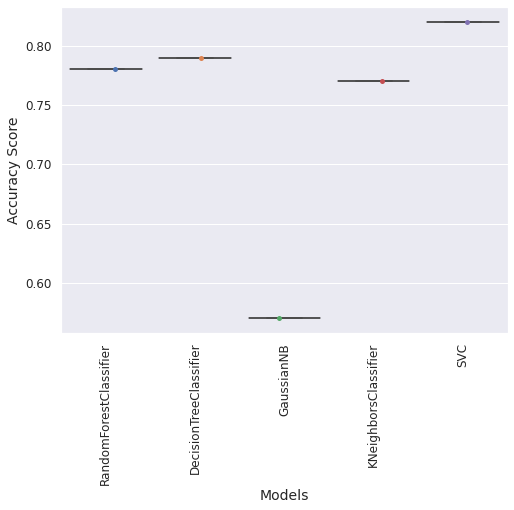

In [ ]:
# Boxplot with Seaborn
import seaborn as sns
plt.subplots(figsize=(8,6))
sns.set_style('whitegrid')
ax= sns.boxplot(x='Models',y='Accuracy Score',data=SMA_compared)
plt.xticks(rotation=90)
ax = sns.stripplot(x="Models", y="Accuracy Score",data=SMA_compared)

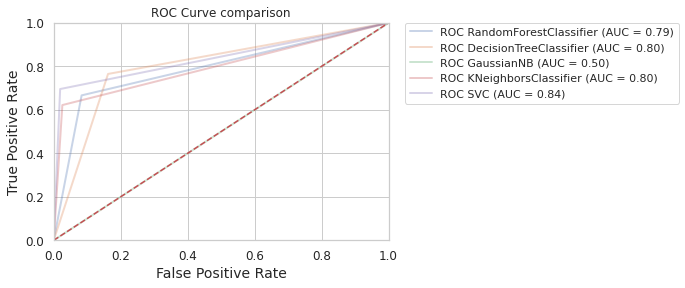

In [ ]:
# Creating plot to show the ROC for all Models
index = 1
for alg in SMA:
    
    
    predicted = alg.fit(X_train_SC, y_train).predict(X_test_SC)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_SMA = auc(fp, tp)
    SMA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (SMA_name, roc_auc_SMA))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

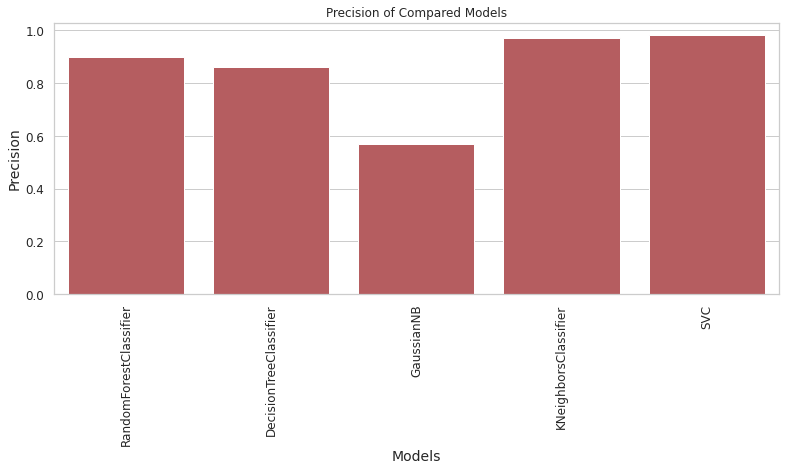

In [ ]:
# Creating plots to compare precision of the Models
plt.subplots(figsize=(13,5))
#sns.lineplot(x="Models", y="Precision",data=SMA_compared, color = "r")
sns.barplot(x="Models", y="Precision",data=SMA_compared, color = 'r')
plt.xticks(rotation=90)
plt.title('Precision of Compared Models')
plt.show()

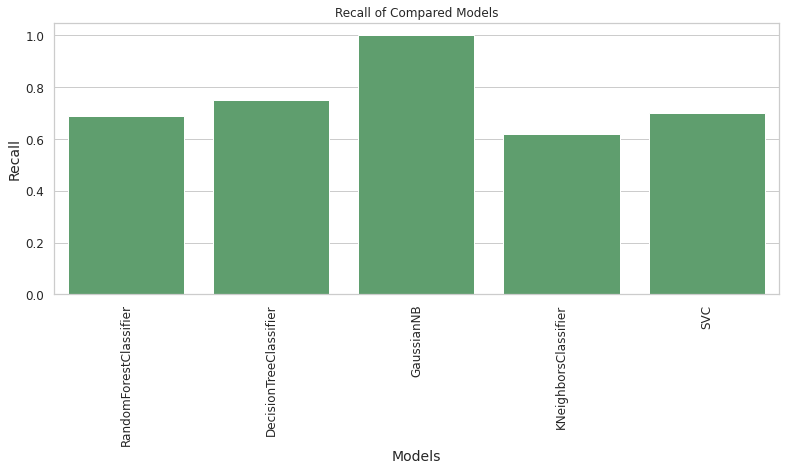

In [ ]:
# Creating plots plots to compare Recall of the Models
plt.subplots(figsize=(13,5))
sns.barplot(x="Models", y="Recall",data=SMA_compared, color = 'g')
plt.xticks(rotation=90)
plt.title('Recall of Compared Models')
plt.show()

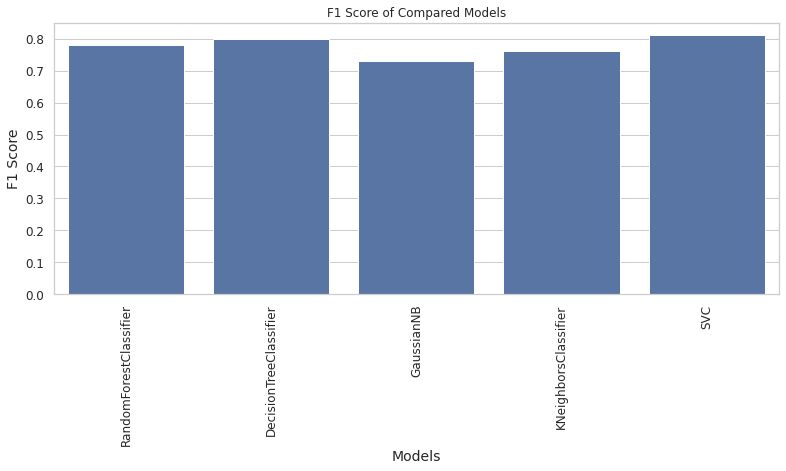

In [ ]:
# Creating plots plots to compare Recall of the Models
plt.subplots(figsize=(13,5))
sns.barplot(x="Models", y="F1 Score",data=SMA_compared, color = 'b')
plt.xticks(rotation=90)
plt.title('F1 Score of Compared Models')
plt.show()